# _Test w/ `get_tweets.py` script_

In [1]:
# import script that has function that returns a users tweets
from settings import get_tweets

In [2]:
get_tweets.get_tweets(username='realDonaldTrump')

writing to realDonaldTrump_tweets.csv


In [3]:
# see what the CSV looks like
import pandas as pd
pd.set_option('display.max_columns', None)

tweets = pd.read_csv('realDonaldTrump_tweets.csv')

In [4]:
tweets.head()

,realDonaldTrump,1179807522116575232,2019-10-03 17:16:47,9111,40130,"b'95% Approval Rating in the Republican Party, and record setting fundraising that has taken place over the past two weeks. Thank you!'"
0,realDonaldTrump,1179804457112129537,2019-10-03 17:04:36,9078,27781,"b'Leader McCarthy, we look forward to you soon..."
1,realDonaldTrump,1179782346209251328,2019-10-03 15:36:45,11323,37939,b'https://t.co/2TfEyp1dHX'
2,realDonaldTrump,1179753043908268032,2019-10-03 13:40:19,15719,55479,"b'Fake News, just like the snakes and gators i..."
3,realDonaldTrump,1179749665941676032,2019-10-03 13:26:53,10977,0,b'RT @DonaldJTrumpJr: Good times with @seanhan...
4,realDonaldTrump,1179730204001996800,2019-10-03 12:09:33,18155,63272,b'Schiff is a lowlife who should resign (at le...


In [5]:
# change column names 
tweets.columns = ['username', 'id', 'created_at', 'retweet_count', 'favorite_count',
                  'tweet']; tweets.head()

,username,id,created_at,retweet_count,favorite_count,tweet
0,realDonaldTrump,1179804457112129537,2019-10-03 17:04:36,9078,27781,"b'Leader McCarthy, we look forward to you soon..."
1,realDonaldTrump,1179782346209251328,2019-10-03 15:36:45,11323,37939,b'https://t.co/2TfEyp1dHX'
2,realDonaldTrump,1179753043908268032,2019-10-03 13:40:19,15719,55479,"b'Fake News, just like the snakes and gators i..."
3,realDonaldTrump,1179749665941676032,2019-10-03 13:26:53,10977,0,b'RT @DonaldJTrumpJr: Good times with @seanhan...
4,realDonaldTrump,1179730204001996800,2019-10-03 12:09:33,18155,63272,b'Schiff is a lowlife who should resign (at le...


In [6]:
# check out the five most recent tweets
tweets['tweet'][:5]

0    b'Leader McCarthy, we look forward to you soon...
1                           b'https://t.co/2TfEyp1dHX'
2    b'Fake News, just like the snakes and gators i...
3    b'RT @DonaldJTrumpJr: Good times with @seanhan...
4    b'Schiff is a lowlife who should resign (at le...
Name: tweet, dtype: object

In [7]:
for tweet in tweets['tweet'].head():
    print(tweet)

b'Leader McCarthy, we look forward to you soon becoming Speaker of the House. The Do Nothing Dems don\xe2\x80\x99t have a chance! https://t.co/uWPdGJg99F'
b'https://t.co/2TfEyp1dHX'
b'Fake News, just like the snakes and gators in the moat. The Media is deranged, they have lost their minds! https://t.co/rk26SXj4il'
b'RT @DonaldJTrumpJr: Good times with @seanhannity last night talking Adam #FullOfSchiff\n\n\xe2\x80\x9cSchiff is basically the Jussie Smollett of Congres\xe2\x80\xa6'
b'Schiff is a lowlife who should resign (at least!). https://t.co/nGp9aFP3rX'


# _Regex_

In [8]:
# an initial exploration into text pre-processing
import re

regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

In [9]:
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)

In [10]:
def tokenize(s):
    return tokens_re.findall(s)

In [12]:
first_tweet = tweets['tweet'][0]

In [13]:
tokenize(first_tweet)

["b'Leader",
 'McCarthy',
 ',',
 'we',
 'look',
 'forward',
 'to',
 'you',
 'soon',
 'becoming',
 'Speaker',
 'of',
 'the',
 'House',
 '.',
 'The',
 'Do',
 'Nothing',
 'Dems',
 'don',
 '\\',
 'xe2',
 '\\',
 'x80',
 '\\',
 'x99t',
 'have',
 'a',
 'chance',
 '!',
 "https://t.co/uWPdGJg99F'"]

# _TextBlob_

In [14]:
from textblob import TextBlob

In [18]:
blob = TextBlob(first_tweet)
sent = blob.sentiment; sent

Sentiment(polarity=0.5625, subjectivity=0.8500000000000001)

In [23]:
for tweet in tweets['tweet'].head():
    tweet_sentiment = TextBlob(tweet).sentiment
    print(tweet_sentiment)

Sentiment(polarity=0.5625, subjectivity=0.8500000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.35, subjectivity=0.33333333333333337)
Sentiment(polarity=-0.375, subjectivity=0.4)


- can use sentiment analysis to tag each tweet with a sentiment score, from `-1` to `1`
    - `-1`: means the tweet is very negative
    - `0`: neutral
    - `1`: means the tweet is very positive
- sentiment analysis tools typically generate score based on works known to be positive/negative sentiment
    - ex. if `hate` occurs in a string, more likely to be negative
    - essentially string matching, extremely quick (i.e. a good thing for this case)
- can use `TextBlob` library to perform sentiment analysis
- we need to extract `polarity` and `subjectivity` 
    - `polarity`: positivity/negativity of tweet on -1 to 1 scale
    - `subjectivity`: how objective/subjective the tweet is, 0 being very objective and 1 being very subjective

In [31]:
polarity_scores = []
subjectivity_scores = []

for tweet in tweets['tweet']:
    # gather Sentiment of Tweet
    tweet_sentiment = TextBlob(tweet).sentiment
    # append polarity score to list
    polarity_scores.append(tweet_sentiment[0])
    # append subjectivity score to list
    subjectivity_scores.append(tweet_sentiment[1])

In [35]:
# create two new columns to store polarity scores and subjectivity scores for each tweet
tweets['polarity'] = pd.Series(polarity_scores)
tweets['subjectivity'] = pd.Series(subjectivity_scores)

In [36]:
tweets.head()

,username,id,created_at,retweet_count,favorite_count,tweet,polarity,subjectivity
0,realDonaldTrump,1179804457112129537,2019-10-03 17:04:36,9078,27781,"b'Leader McCarthy, we look forward to you soon...",0.5625,0.850000
1,realDonaldTrump,1179782346209251328,2019-10-03 15:36:45,11323,37939,b'https://t.co/2TfEyp1dHX',0.0000,0.000000
2,realDonaldTrump,1179753043908268032,2019-10-03 13:40:19,15719,55479,"b'Fake News, just like the snakes and gators i...",-0.6250,1.000000
3,realDonaldTrump,1179749665941676032,2019-10-03 13:26:53,10977,0,b'RT @DonaldJTrumpJr: Good times with @seanhan...,0.3500,0.333333
4,realDonaldTrump,1179730204001996800,2019-10-03 12:09:33,18155,63272,b'Schiff is a lowlife who should resign (at le...,-0.3750,0.400000


In [37]:
# import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

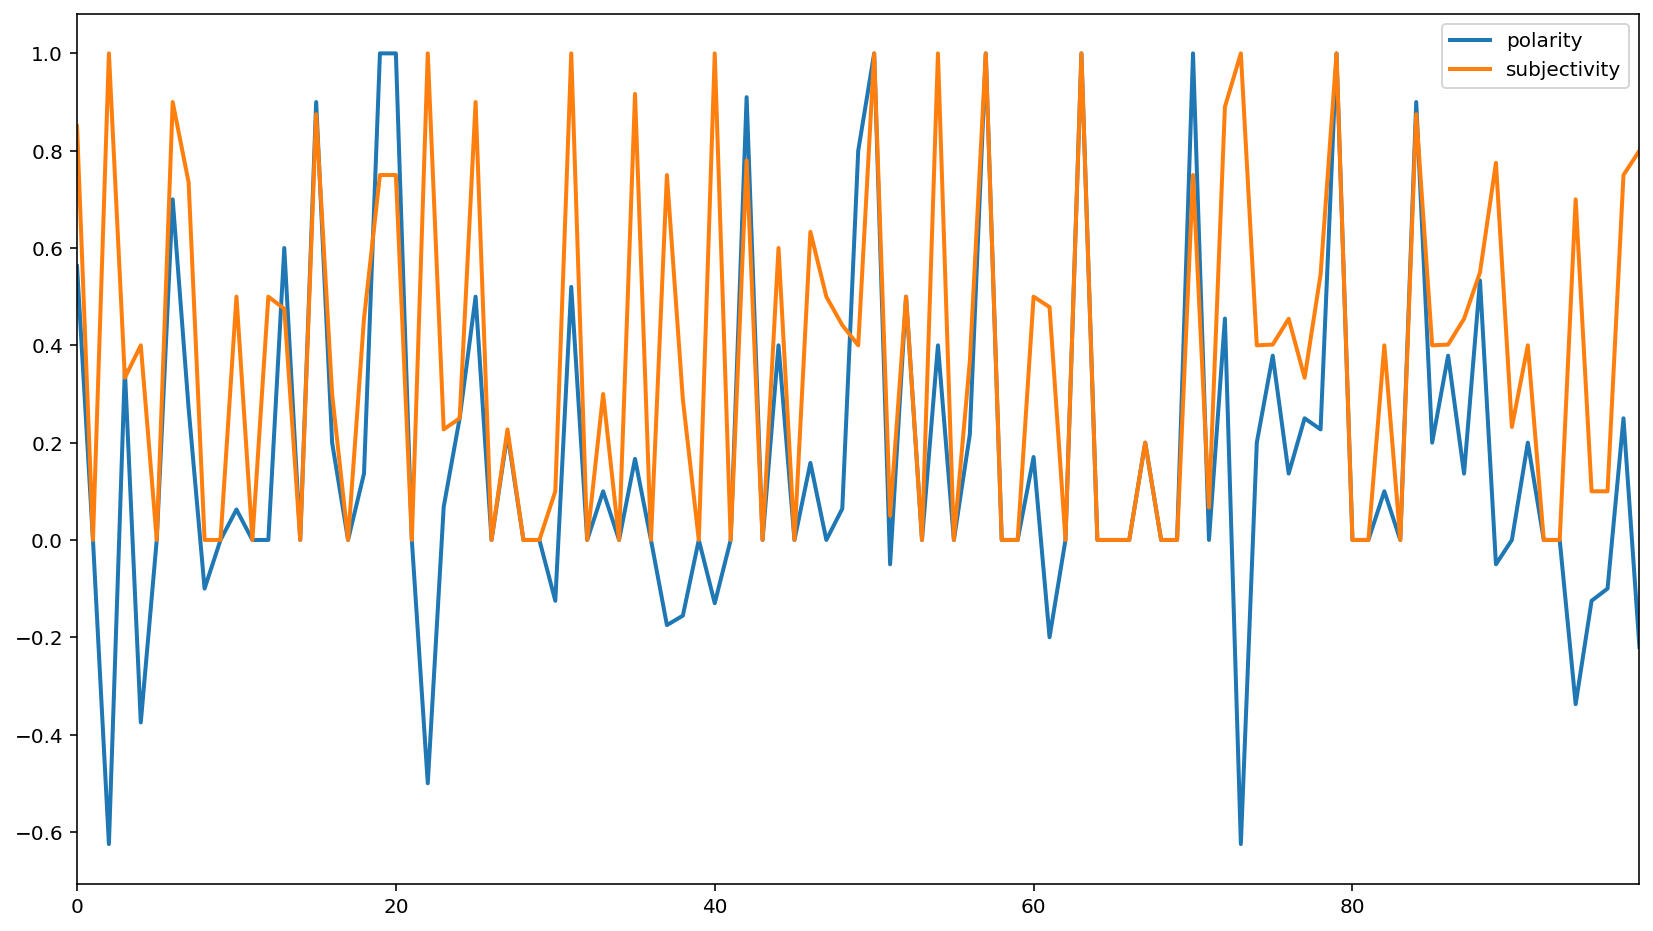

In [43]:
# plot polarity and subjectivity over time
tweets[['polarity', 'subjectivity']].plot.line(figsize=(14,8), linewidth=2);

In [44]:
# standardize the polarity and subjectivity so they are on same scale
from sklearn.preprocessing import StandardScaler

# produce standard scaler object
scaler = StandardScaler()

In [50]:
# fit and transform polarity and subjectivity so they are on same scale
scaler.fit_transform(tweets[['polarity', 'subjectivity']])[:5]

array([[ 1.09677359,  1.30209818],
       [-0.47695443, -1.07280129],
       [-2.22554111,  1.72119808],
       [ 0.50225412, -0.14146817],
       [-1.52610644,  0.04479846]])

Here is the link to [`StandardScaler`'s](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) documentation.

In [51]:
# produce new standard scaler object
scaler = StandardScaler()

# let's apply what we did above to the two columns now
tweets[['polarity', 'subjectivity']] = scaler.fit_transform(tweets[['polarity', 'subjectivity']])

In [54]:
# to make sure everything worked let's check the mean and standard deviation of these two columns
print(tweets[['polarity', 'subjectivity']].mean(axis=0))
print('-' * 30)
print(tweets[['polarity', 'subjectivity']].std(axis=0))

polarity       -3.588600e-17
subjectivity    5.382900e-17
dtype: float64
------------------------------
polarity        1.005089
subjectivity    1.005089
dtype: float64


There are (approximately) on the same scale! Let's plot them now to see if we can get a clearer picture.

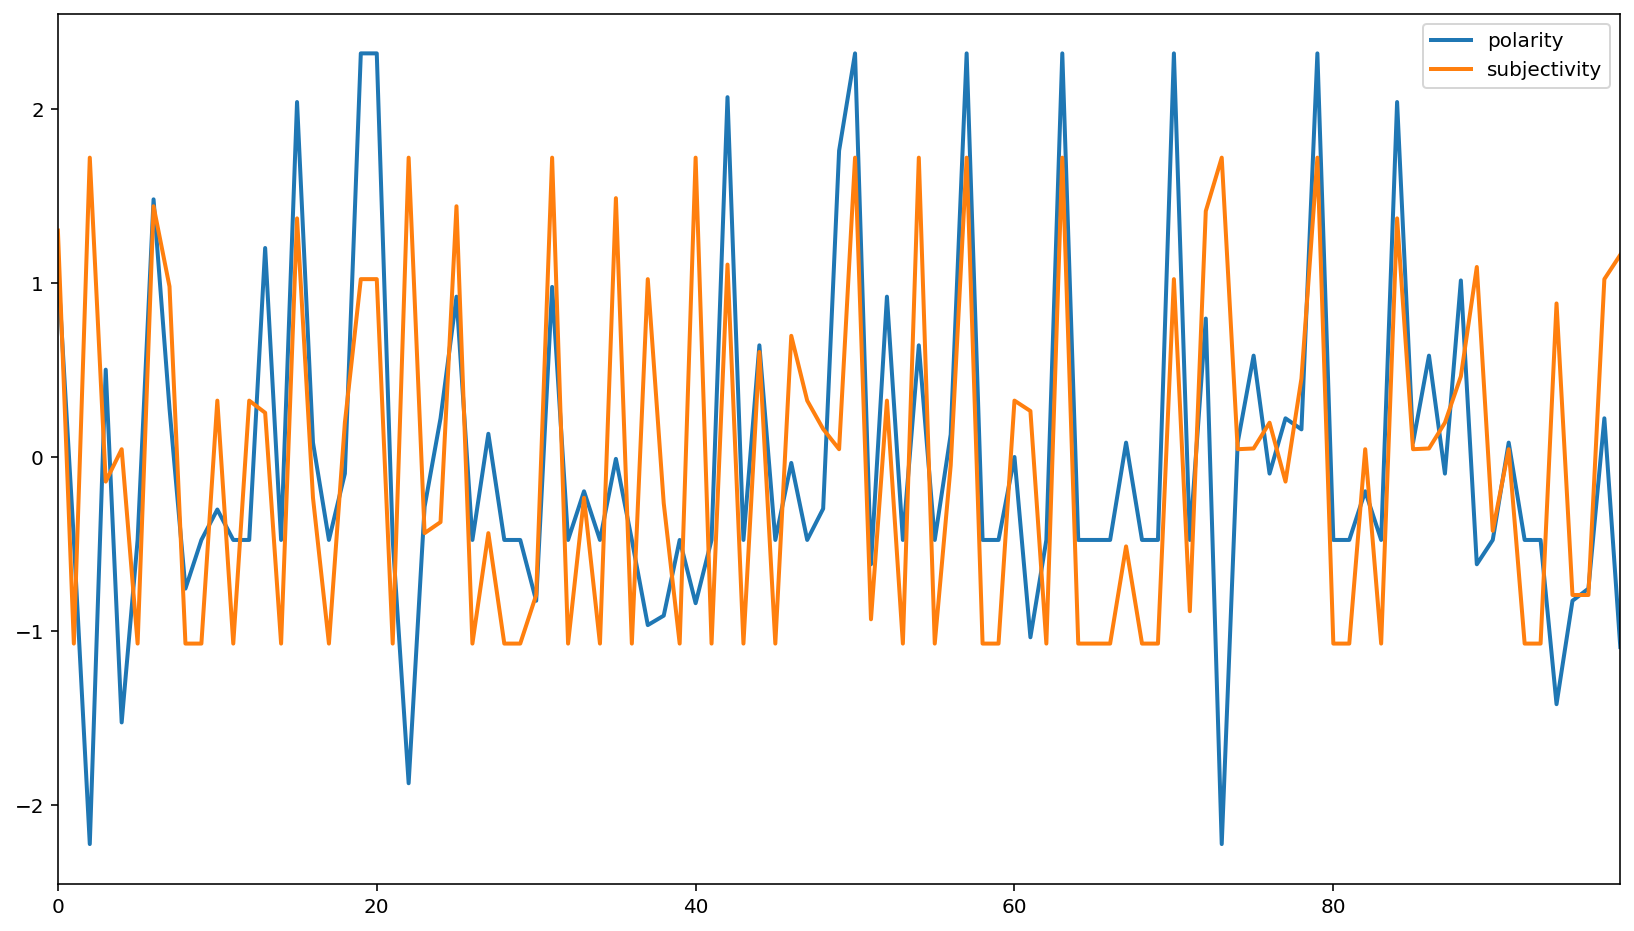

In [55]:
# plot polarity and subjectivity over time
tweets[['polarity', 'subjectivity']].plot.line(figsize=(14,8), linewidth=2);

The standardization shifted both `polarity` and `subjectivity` onto the same scale. While this does help us compare the two more directly, our graph of the standardized variables is showing is pretty much the same picture that the original line graph showed us. 

Let's examine `polarity` a little closer. Remember it is on a new scale, see below for reference:
- `-2`: means the tweet is very negative
- `0`: neutral
- `2`: means the tweet is very positive

Another thing we could check out is a scatterplot to see if there is any type of relationship 
between the polarity and subjectivity of tweets.

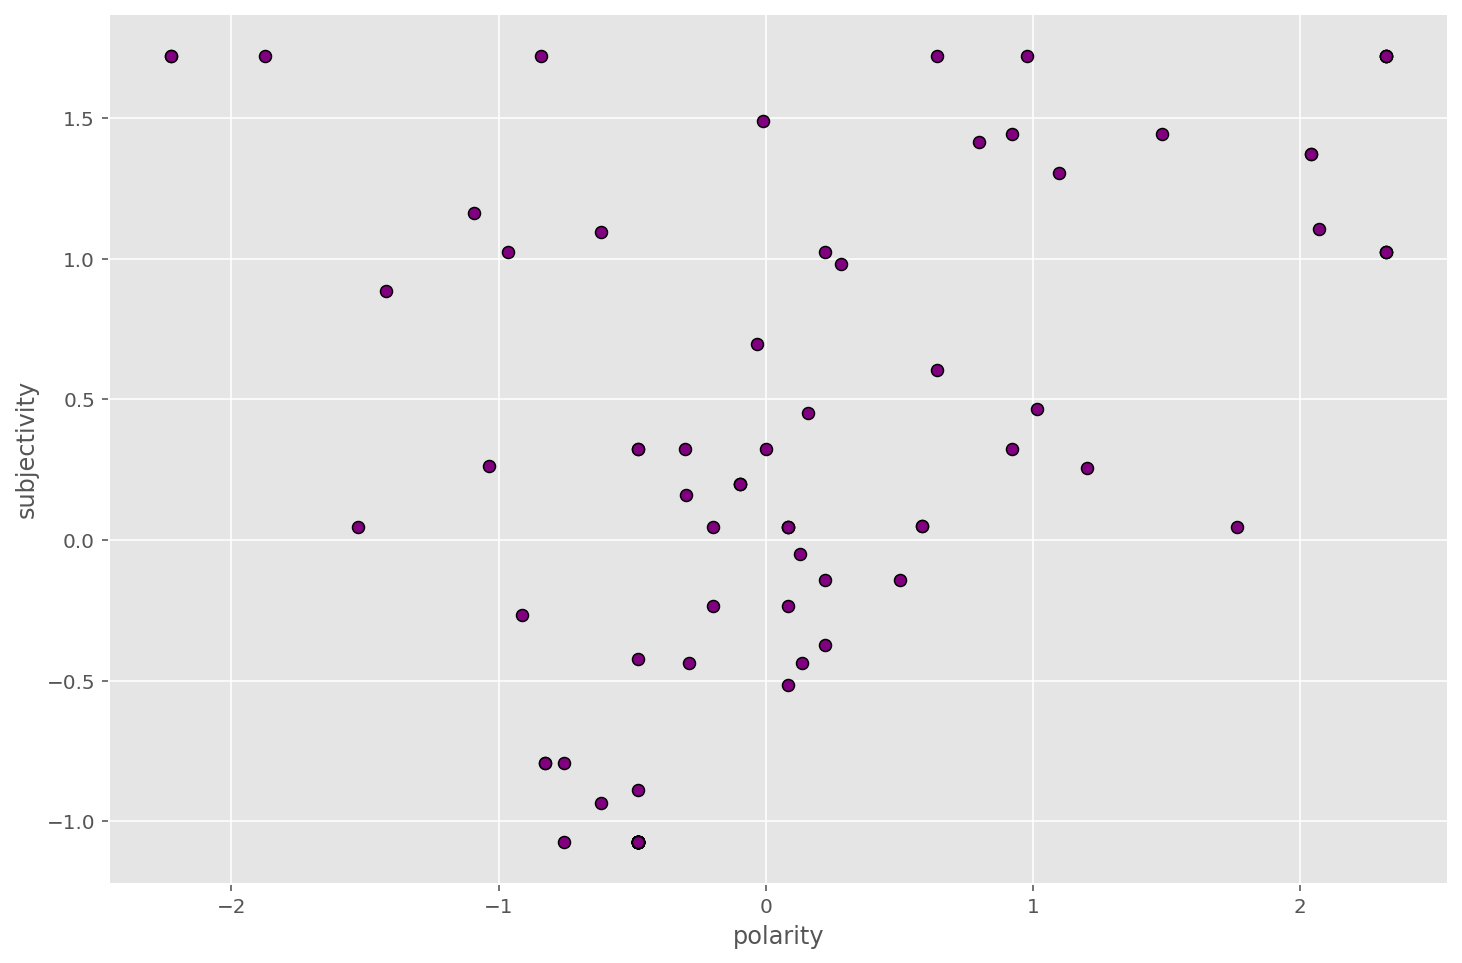

In [76]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x='polarity', y='subjectivity', data=tweets, color='purple', edgecolor='black');

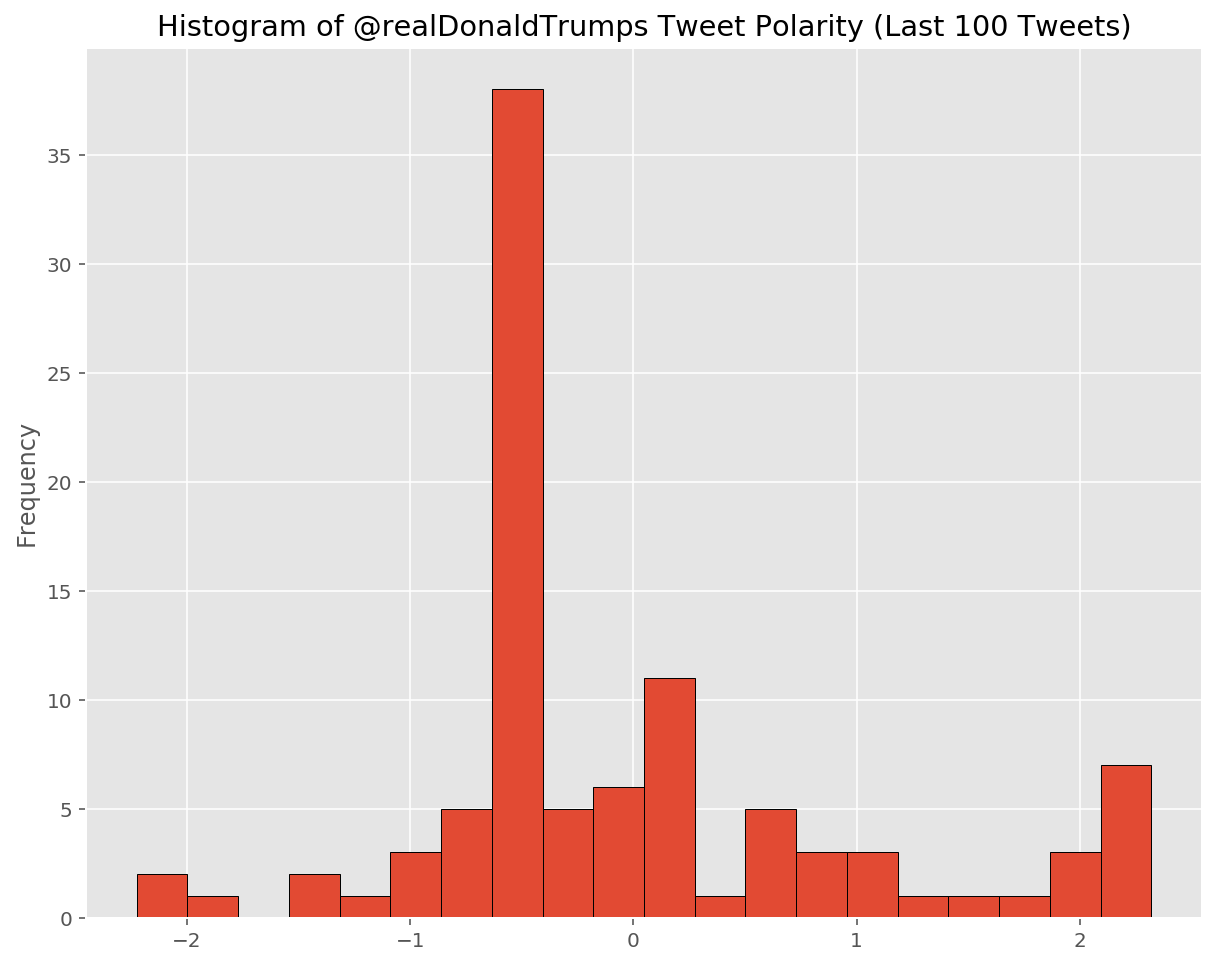

In [67]:
plt.style.use('ggplot')

# histogram of tweet polarity values
tweets['polarity'].plot.hist(figsize=(10,8), edgecolor='black', bins=20)
plt.title('Histogram of @realDonaldTrumps Tweet Polarity (Last 100 Tweets)');

In [85]:
standardize = StandardScaler()

# explore relationship between polarity and retweet count
retweet_polarity = pd.DataFrame(standardize.fit_transform(tweets[['retweet_count', 'polarity']]),
                                columns=['retweet_count', 'polarity'])

In [100]:
import numpy as np

for col in retweet_polarity:
    print('Column Name: {}'.format(str(col)))
    print('Mean for {} column: {}'.format(col, round(np.mean(retweet_polarity[col]), 4)))
    print('Std. Deviation for {} column: {}'.format(col, round(np.std(retweet_polarity[col]), 4)))
    print('-' * 30)

Column Name: retweet_count
Mean for retweet_count column: -0.0
Std. Deviation for retweet_count column: 1.0
------------------------------
Column Name: polarity
Mean for polarity column: 0.0
Std. Deviation for polarity column: 1.0
------------------------------


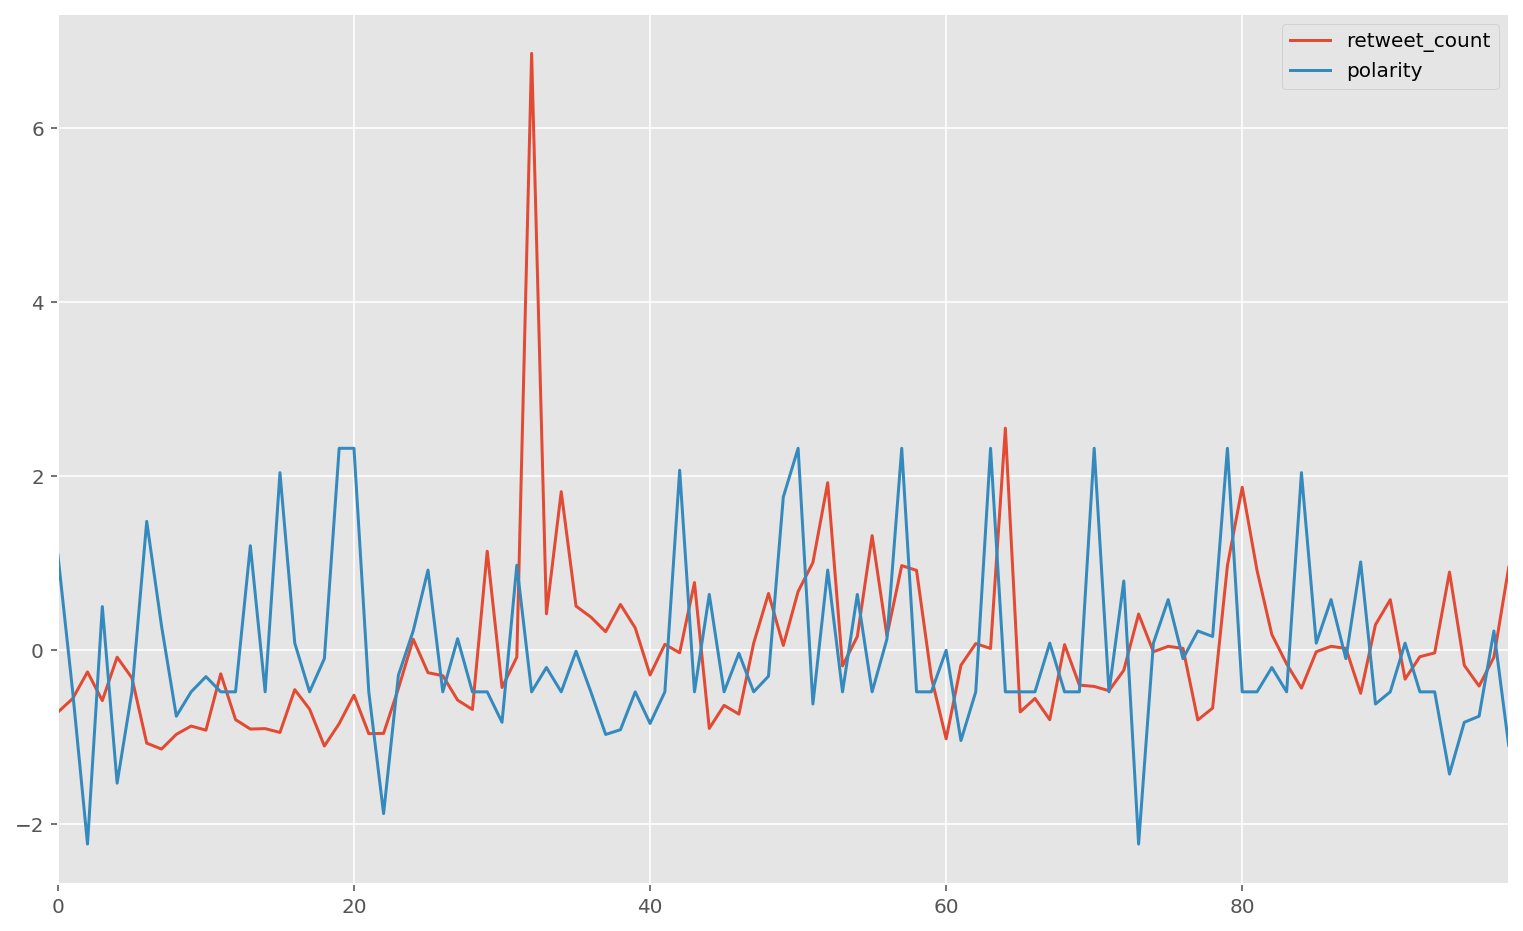

In [94]:
retweet_polarity[['retweet_count', 'polarity']].plot.line(figsize=(13,8));

# _Machine Learning: Is it even practical for this?_

In [117]:
# tokenize text with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X = vect.fit_transform(tweets['tweet'])

In [118]:
from sklearn.feature_extraction.text import TfidfTransformer

# from occurrences to frequencies
tfidf = TfidfTransformer()
X_tf = tfidf.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tf, tweets['tweet'], test_size=0.2)

In [120]:
X_train

<79x786 sparse matrix of type '<class 'numpy.float64'>'
	with 1549 stored elements in Compressed Sparse Row format>

In [121]:
# !pip install yellowbrick

In [123]:
# train a simple random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_tf, tweets['polarity'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [124]:
pred = rf.predict(X_tf)

In [125]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(tweets['polarity'], pred))

0.272900934247464

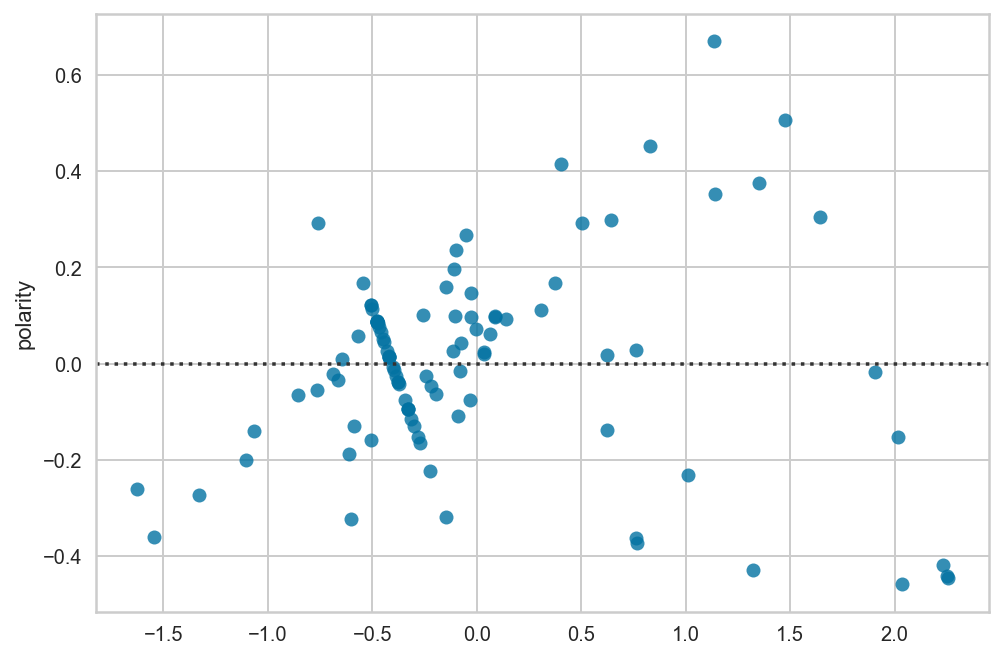

In [130]:
sns.residplot(x=pred, y=tweets['polarity']);